## Modelling and EDA

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
import string
import re

%matplotlib inline

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,username,country,region,tweets,0,1,2,3,4,5,...,21,22,23,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,electronicalree,belgium,europe,"We've just updated our ""Secret Weapons & Gems""...",64,39,22,28,14,16,...,50,27,37,44,77,71,94,96,86,32
1,suarezlegroupe,belgium,europe,Good night! #andalusia 🔥 pic.twitter.com/xPtdm...,1,3,6,29,3,1,...,3,2,3,18,9,15,16,15,10,16
2,twezus,belgium,europe,We need to talk about Rudy. https://www.nieuws...,25,39,43,32,34,52,...,27,32,28,74,104,64,80,78,63,37
3,focusvif,belgium,europe,"Marion Cotillard, profession: actrice https://...",36,32,14,15,17,8,...,44,51,34,84,74,83,76,108,48,27
4,tuiflybelgium,belgium,europe,For long haul flights we advise you to be at t...,22,16,21,19,12,13,...,33,37,24,72,88,63,79,86,60,52


In [4]:
df['region'].value_counts()

asia       2857
america    1979
europe     1978
oceania    1975
Name: region, dtype: int64

In [5]:
df['country'].value_counts()

united-kingdom    999
united-states     998
australia         989
new-zealand       986
canada            981
belgium           979
malaysia          964
indonesia         963
singapore         930
Name: country, dtype: int64

In [6]:
X = df[[str(i) for i in list(range(24))]]

In [7]:
y = df['region']

### Heatmap visualizations for different regions

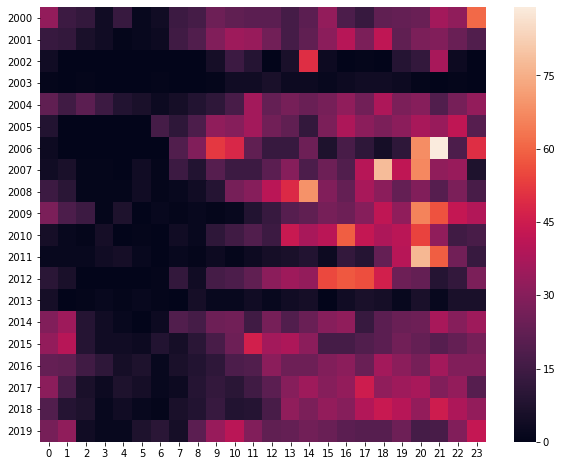

In [8]:
# Asia
plt.figure(figsize=(10,8))
sns.heatmap(X[2000:2020])

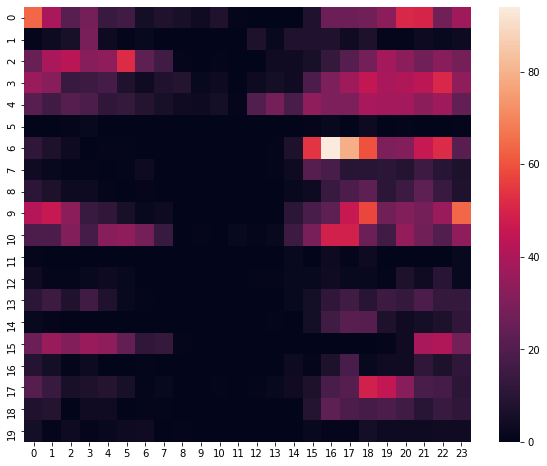

In [9]:
# Europe
plt.figure(figsize=(10,8))
sns.heatmap(X[:20])

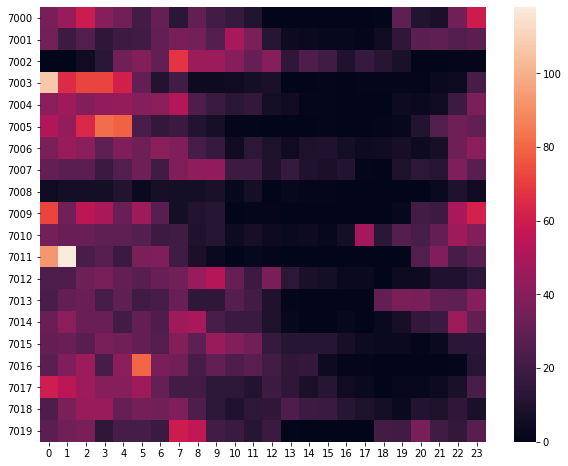

In [10]:
# America
plt.figure(figsize=(10,8))
sns.heatmap(X[7000:7020])

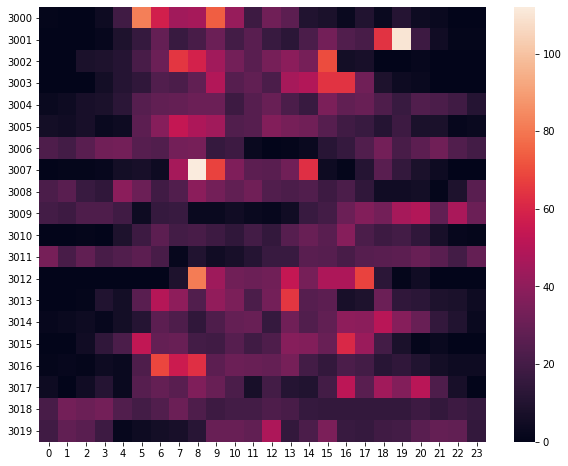

In [11]:
# Oceania
plt.figure(figsize=(10,8))
sns.heatmap(X[3000:3020])

### PCA visualizations

In [15]:
COLORS = {'asia': 'red', 'europe': 'blue', 'america': 'green', 'oceania': 'orange'} 

def scatter(x, colors):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    ax.scatter(
        x[(colors=='asia'), 0], 
        x[(colors=='asia'), 1], 
        c=COLORS['asia'], 
        label='Asia', 
        alpha=0.5
    )
    ax.scatter(
        x[(colors=='europe'), 0], 
        x[(colors=='europe'), 1], 
        c=COLORS['europe'], 
        label='Europe', 
        alpha=0.5
    )
    ax.scatter(
        x[(colors=='oceania'), 0], 
        x[(colors=='oceania'), 1], 
        c=COLORS['oceania'], 
        label='Oceania', 
        alpha=0.5
    )
    ax.scatter(
        x[(colors=='america'), 0], 
        x[(colors=='america'), 1], 
        c=COLORS['america'], 
        label='America', 
        alpha=0.5
    )
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    plt.legend()
    return f, ax

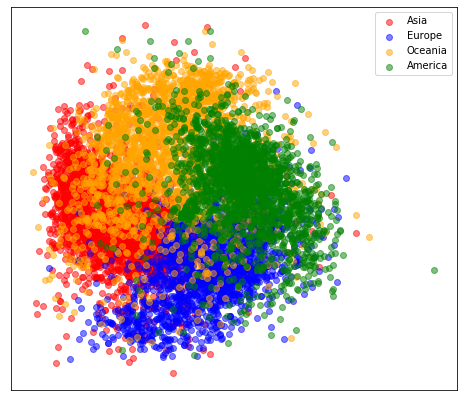

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
f, ax = scatter(X_pca, y)

### Train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

In [18]:
X_train.shape

(6591, 24)

In [19]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
7505,25,30,30,54,46,79,60,23,55,17,...,1,2,0,0,3,2,7,5,15,16
6244,19,38,49,32,30,30,39,34,42,49,...,9,4,4,0,0,0,12,8,12,17
1086,19,17,14,13,12,13,14,0,15,32,...,38,24,32,41,24,25,8,17,15,0
5076,0,0,0,1,0,0,0,5,12,137,...,10,99,10,4,7,13,0,3,1,0
8368,34,39,36,30,47,24,24,19,2,0,...,3,22,28,30,30,16,26,17,20,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,25,15,12,8,7,1,1,0,1,0,...,27,24,30,43,32,46,47,30,37,52
5164,4,0,0,0,2,1,1,12,130,43,...,14,17,22,38,26,11,21,13,9,2
4313,0,0,2,4,11,8,23,19,25,15,...,7,4,4,4,5,2,1,0,1,0
4002,0,0,2,15,28,48,59,47,54,49,...,28,18,21,14,7,4,0,0,0,0


In [20]:
classifiers = []
model1 = XGBClassifier(n_estimators=200, learning_rate=0.05);
classifiers.append(model1)
model2 = SVC(probability=True);
classifiers.append(model2)
model3 = AdaBoostClassifier();
classifiers.append(model3)
model4 = RandomForestClassifier();
classifiers.append(model4)
model5 = KNeighborsClassifier();
classifiers.append(model5)
model6 = GradientBoostingClassifier();
classifiers.append(model6)
model7 = ExtraTreesClassifier();
classifiers.append(model7)
model8 = LogisticRegression(solver='lbfgs', max_iter=1000);
classifiers.append(model8)

In [21]:
models = ['XGB','SVM','ADA','RF','KNN','GB','ET','LR']

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
for model,clf in zip(models,classifiers):
    clf.fit(X_train, y_train);
    y_pred= clf.predict(X_test);
    acc = accuracy_score(y_test, y_pred);
    print(f"{model} accuracy is :{acc}")
    cm = confusion_matrix(y_test, y_pred);
    print(cm)

XGB accuracy is :0.881255686988171
[[440   9  20  26]
 [  8 664  27  15]
 [ 32   8 452   3]
 [ 51  35  27 381]]
SVM accuracy is :0.8616924476797089
[[430  17  22  26]
 [  4 641  53  16]
 [ 35  10 444   6]
 [ 54  33  28 379]]
ADA accuracy is :0.83803457688808
[[411  13  37  34]
 [  8 634  29  43]
 [ 25  35 417  18]
 [ 52  39  23 380]]
RF accuracy is :0.8885350318471338
[[443  11  15  26]
 [  8 668  26  12]
 [ 36   8 448   3]
 [ 45  32  23 394]]
KNN accuracy is :0.8585077343039127
[[439  10  21  25]
 [ 18 649  29  18]
 [ 43  17 431   4]
 [ 65  36  25 368]]
GB accuracy is :0.8826205641492265
[[443   7  17  28]
 [  8 663  22  21]
 [ 34   9 447   5]
 [ 52  34  21 387]]
ET accuracy is :0.8839854413102821
[[445  12  16  22]
 [ 10 669  26   9]
 [ 37   8 447   3]
 [ 51  37  24 382]]
LR accuracy is :0.8475887170154686
[[405  11  30  49]
 [  7 636  52  19]
 [ 35   8 442  10]
 [ 40  41  33 380]]


In [23]:
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05)
xgb.fit(X_train, y_train)
xgb.score(X_train,y_train)

0.9100288271885905

In [24]:
xgb.score(X_test,y_test)

0.881255686988171

In [25]:
# from joblib import dump

# dump(xgb, 'xgb_region.joblib')

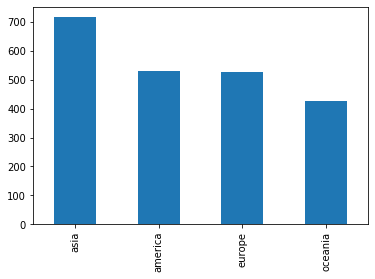

In [32]:
pd.Series(model1.predict(X_test)).value_counts().plot(kind='bar') # Predict val counts 

In [243]:
pd.DataFrame(model1.predict(X_test))[0].value_counts()

asia       717
america    519
europe     516
oceania    446
Name: 0, dtype: int64

Asia is the most predicted category and oceania is the least as there are overlapping timezone between these regions

### Region prediction with Deep Learning

In [33]:
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler, LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


Using TensorFlow backend.


In [34]:
le = LabelEncoder()
y_encoded = le.fit_transform(y) # {0: america, 1:asia, 2:europe, 3:oceania}

In [35]:
y_cat = to_categorical(y_encoded)
y_cat[:10]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y_cat,stratify=y_encoded, random_state=42)

In [38]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [39]:
model = Sequential()
model.add(Dense(32, input_shape=(24,), activation='relu'))
model.add(Dense(16))
model.add(Dense(4, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                800       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
Total params: 1,396
Trainable params: 1,396
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
History = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test))

Train on 6591 samples, validate on 2198 samples
Epoch 1/20
6591/6591 [==============================] - 1s 166us/step - loss: 0.5879 - accuracy: 0.8009 - val_loss: 0.4916 - val_accuracy: 0.8471
Epoch 2/20
6591/6591 [==============================] - 1s 97us/step - loss: 0.4661 - accuracy: 0.8527 - val_loss: 0.4634 - val_accuracy: 0.8530
Epoch 3/20
6591/6591 [==============================] - 1s 96us/step - loss: 0.4420 - accuracy: 0.8624 - val_loss: 0.4505 - val_accuracy: 0.8530
Epoch 4/20
6591/6591 [==============================] - 1s 98us/step - loss: 0.4302 - accuracy: 0.8631 - val_loss: 0.4446 - val_accuracy: 0.8590
Epoch 5/20
6591/6591 [==============================] - 1s 97us/step - loss: 0.4217 - accuracy: 0.8660 - val_loss: 0.4479 - val_accuracy: 0.8603
Epoch 6/20
6591/6591 [==============================] - 1s 96us/step - loss: 0.4147 - accuracy: 0.8675 - val_loss: 0.4335 - val_accuracy: 0.8722
Epoch 7/20
6591/6591 [==============================] - 1s 96us/step - loss: 0.40

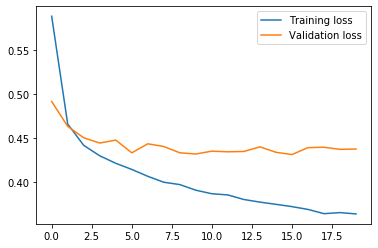

In [43]:
plt.plot(History.history['loss'], label='Training loss')
plt.plot(History.history['val_loss'], label='Validation loss')
plt.legend()

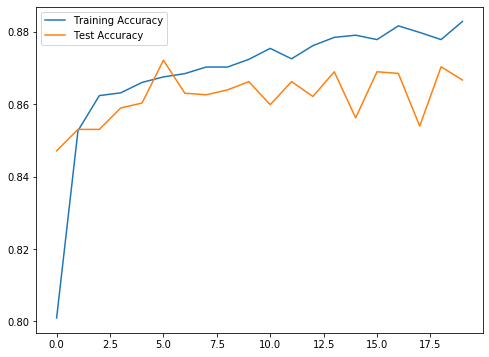

In [44]:
plt.figure(figsize=(8,6))
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Test Accuracy')
plt.legend()

In [61]:
c_dict = {0: 'america', 1:'asia', 2:'europe', 3:'oceania'}

In [62]:
c_dict

{0: 'america', 1: 'asia', 2: 'europe', 3: 'oceania'}

In [66]:
pred_df = pd.DataFrame([[c_dict[list(prob).index(max(prob))], max(prob)] for prob in model.predict(X_test)], 
             columns=['Region','Probability'])

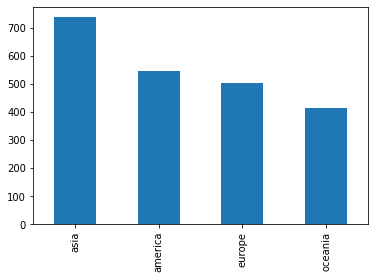

In [72]:
pred_df['Region'].value_counts().plot(kind='bar')

Similar to machine learning techniques

In [73]:
pred_df['Region'].value_counts()

asia       737
america    544
europe     503
oceania    414
Name: Region, dtype: int64

## Country Prediction

Cleaning tweets

In [116]:
with open('data/stopwords.txt') as f:
    stopwords = {line.rstrip('\n') for line in f if '#' not in line}

In [118]:

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def remove_url(text):
    r = [w for w in text.split() if 'pictwittercom' in w]
    for i in r:
        text = re.sub(i, '', text)
    return text

def clean_tweet(text):
    text.encode("ascii", "ignore").decode("ascii") # remove emoji
    text = remove_pattern(text, "@[\w]*")  # Remove @mentions
    text = re.sub(r'http[s]{0,1}://[^\s]*', '', text) # remove http websites
    text = text.replace('\n',' ') # replace \n
    text = text.replace('\xa0', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = remove_url(text) 
    text = [t.lower() for t in text.split()] # lower case
    text = [w for w in text if w not in stopwords] # remove stopwords
    return " ".join(text)


In [119]:
df['clean_tweets'] = df['tweets'].map(clean_tweet)

In [120]:
tfidf_vectorizer = TfidfVectorizer(max_features=500)
X = tfidf_vectorizer.fit_transform(df['clean_tweets'])

In [121]:
y = df['country']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

In [123]:
classifiers = []
model1 = XGBClassifier(n_estimators=200, learning_rate=0.05);
classifiers.append(model1)
model2 = SVC(probability=True);
classifiers.append(model2)
model3 = AdaBoostClassifier();
classifiers.append(model3)
model4 = RandomForestClassifier();
classifiers.append(model4)
model5 = KNeighborsClassifier();
classifiers.append(model5)
model6 = GradientBoostingClassifier();
classifiers.append(model6)
model7 = ExtraTreesClassifier();
classifiers.append(model7)
model8 = LogisticRegression(solver='lbfgs', max_iter=1000);
classifiers.append(model8)

In [124]:
models = ['XGB','SVM','ADA','RF','KNN','GB','ET','LR']

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix
for model,clf in zip(models,classifiers):
    clf.fit(X_train, y_train);
    y_pred= clf.predict(X_test);
    acc = accuracy_score(y_test, y_pred);
    print(f"{model} accuracy is :{acc}")
    cm = confusion_matrix(y_test, y_pred);
    print(cm)

XGB accuracy is :0.8248407643312102
[[194   6   6   0   0  11   4  13  13]
 [  4 209   9   0   2   3   5   9   4]
 [  6  17 171   3   2   1   3   8  34]
 [  0   6   1 217  10   0   2   0   5]
 [  1  11   4  20 193   1   5   3   3]
 [ 12   6   1   0   0 223   0   3   2]
 [  2   8   2   4   9   1 202   2   2]
 [ 11   6   6   3   0   4   6 201  13]
 [ 12   8  14   2   1   3   0   7 203]]
SVM accuracy is :0.7907188353048226
[[169   9  14   0   3  15   5  13  19]
 [  5 209   4   6   5   3   5   5   3]
 [  5  17 155   4   5   3   5  11  40]
 [  0   2   3 217  12   0   4   0   3]
 [  1   3   8  27 183   1   9   4   5]
 [ 12   4   4   3   2 215   3   3   1]
 [  1  10   9   5   8   5 185   0   9]
 [ 10   9   6   3   3   3   2 197  17]
 [  6   4  16   7   0   4   1   4 208]]
ADA accuracy is :0.7252047315741583
[[171   8   4   0   3  22  10  17  12]
 [  4 197   8   2   4   5   7  12   6]
 [  9  27 138   4   1   4   4  23  35]
 [  2   8   2 181  36   0   6   0   6]
 [  2  10   2  24 180   0  14   

### Sentiment Analysis

In [269]:
import json

with open('sia.json','r') as f:
    data = json.load(f)

In [271]:
data['tweets'][0]['tweet']

'I love you, keep going!'

In [264]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
res = [analyzer.polarity_scores(t)['compound'] for t in eur['clean_tweets'][:5]]

In [265]:
res

[1.0, 0.992, 0.9978, 0.9516, 1.0]

In [279]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

res = []
analyzer = SentimentIntensityAnalyzer()
for tweet in data['tweets']:
    vs = analyzer.polarity_scores(tweet['tweet'])
    print(tweet['tweet'])
    print(vs)
    print()

I love you, keep going!
{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.6696}

Sia x @bts_twt are taking over! New remix of 🔛 from #MapOfTheSoul7 out now  https://ibighit.com/bts  🎶💫 - Team Sia pic.twitter.com/Z2GZcYwwHb
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

#ProtectMillions Every day in Cambodia, Indonesia and Vietnam, pet dogs and cats are stolen from loving families, leaving their owners desperate for their return. Please sign the #petition from @fourpawsint to end the dog and cat meat trade  http://bit.ly/end-dog-cat-meat-trade-SEA … - Team Sia
{'neg': 0.113, 'neu': 0.76, 'pos': 0.127, 'compound': 0.1779}

I have a few features coming up but am focused on my movie which is now due for release Sept, it's a musical so after I promote that I'll put out a new album.
I have two waiting to go!
{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.8181}

Dude. It was genius I can't believe I just found it.
I've told all my friends!!
{'neg': 0.0, 'neu': 0.779, 'pos': 0.2